In [153]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [154]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

In [155]:
data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


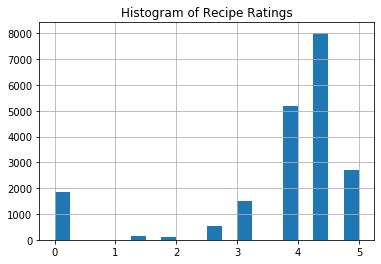

In [156]:
data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [157]:
missing_data = data.isnull().sum()[data.isnull().sum()>0]
print('We have {} columns'.format(len(data.columns)))
missing_data

We have 680 columns


calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [158]:
missing_data = missing_data.index.to_list()
rplc_dct = {np.nan:0}
for i in missing_data:
    data[i] = data[i].replace(rplc_dct)

In [159]:
# Binarize the target variable Rating.
data.rating = data.rating.apply(lambda x: 1 if x > 4 else 0)

In [160]:
corr = data.corr().abs()['rating'].sort_values(ascending=False)
print(corr)

rating                     1.000000
bon appétit                0.097076
house & garden             0.092801
drink                      0.083065
alcoholic                  0.077158
gin                        0.071066
roast                      0.068198
thanksgiving               0.067094
peanut free                0.065897
soy free                   0.065799
cocktail party             0.063534
dinner                     0.062186
spirit                     0.057028
christmas                  0.054409
bitters                    0.052951
grill/barbecue             0.051204
low fat                    0.049230
tree nut free              0.047943
backyard bbq               0.047682
fall                       0.046565
cocktail                   0.045829
pasta                      0.043092
grill                      0.042924
stuffing/dressing          0.042454
harpercollins              0.042345
rum                        0.041792
goat cheese                0.041207
vegan                      0

In [161]:
corr = corr[1:31].index.to_list()
corr.append('rating')
print(corr)

['bon appétit', 'house & garden', 'drink', 'alcoholic', 'gin', 'roast', 'thanksgiving', 'peanut free', 'soy free', 'cocktail party', 'dinner', 'spirit', 'christmas', 'bitters', 'grill/barbecue', 'low fat', 'tree nut free', 'backyard bbq', 'fall', 'cocktail', 'pasta', 'grill', 'stuffing/dressing', 'harpercollins', 'rum', 'goat cheese', 'vegan', 'stir-fry', "father's day", 'dessert', 'rating']


In [162]:
corr

['bon appétit',
 'house & garden',
 'drink',
 'alcoholic',
 'gin',
 'roast',
 'thanksgiving',
 'peanut free',
 'soy free',
 'cocktail party',
 'dinner',
 'spirit',
 'christmas',
 'bitters',
 'grill/barbecue',
 'low fat',
 'tree nut free',
 'backyard bbq',
 'fall',
 'cocktail',
 'pasta',
 'grill',
 'stuffing/dressing',
 'harpercollins',
 'rum',
 'goat cheese',
 'vegan',
 'stir-fry',
 "father's day",
 'dessert',
 'rating']

In [163]:
df = data[corr] 
df.head()

,bon appétit,house & garden,drink,alcoholic,gin,roast,thanksgiving,peanut free,soy free,cocktail party,...,grill,stuffing/dressing,harpercollins,rum,goat cheese,vegan,stir-fry,father's day,dessert,rating
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [164]:
df = df.dropna(axis=1, how='all')

In [165]:
X = df.drop('rating',axis=1)
y = df.rating

In [171]:
# Run PCA.
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
pca.fit(X)
X_pca = pca.transform(X)

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.3, random_state = 465)

In [173]:
# Run SVC with PCA model.
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [174]:
svc_model.score(X_train, y_train)

0.5779424337418068

In [175]:
predictions = svc_model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))

[[ 760 2041]
 [ 519 2696]]


In [176]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.59      0.27      0.37      2801
           1       0.57      0.84      0.68      3215

    accuracy                           0.57      6016
   macro avg       0.58      0.55      0.53      6016
weighted avg       0.58      0.57      0.54      6016



Our SVC model score about 58% on the most correlated columns. Further feature engineering should allow our model even more accuracy.

In [177]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [178]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=0.1, gamma=1, score=0.589, total=   5.9s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.8s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.578, total=   5.8s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.6s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.574, total=   5.7s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.583, total=   6.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.579, total=   5.8s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.562, total=   5.9s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.547, total=   6.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.546, total=   6.2s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.546, total=   6.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  5.1min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [179]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))


[[1391 1410]
 [1095 2120]]


In [180]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.56      0.50      0.53      2801
           1       0.60      0.66      0.63      3215

    accuracy                           0.58      6016
   macro avg       0.58      0.58      0.58      6016
weighted avg       0.58      0.58      0.58      6016



We see slight improvement after performing GridSearchCV and fitting the model